#### Problem statement:- Perform Clustering (Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
**Data Description:**
- Murder   => Murder rates in different places of United States
- Assault  => Assault rate in different places of United States
- UrbanPop => Urban population in different places of United States
- Rape     => Rape rate in different places of United States

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import sklearn.preprocessing as pp
from sklearn.preprocessing import normalize, StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## 3. Initial Data Analysis

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [5]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime_data = crime_data.rename({"Unnamed: 0": "City"}, axis=1, inplace=False)
crime_data.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
crime2 = crime_data.copy()
crime2.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
crime2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## 4. Data Visualization

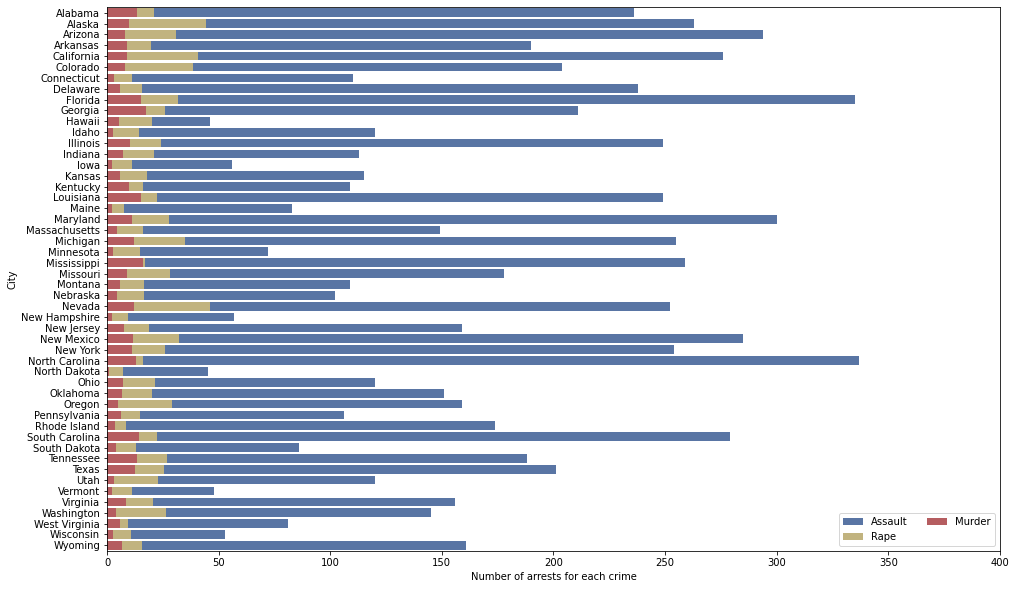

In [10]:
f, ax = plt.subplots(figsize=(16, 10))

sns.set_color_codes("deep")

sns.barplot(x="Assault", y="City", data=crime2, label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=crime2, label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=crime2, label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City", xlabel="Number of arrests for each crime")
plt.show()

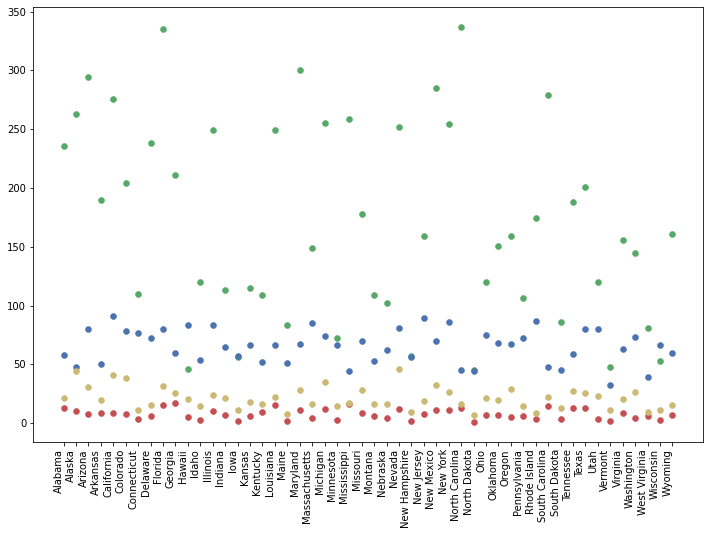

In [11]:
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(crime2.City, crime2.Murder, color='r', linewidths=0.5)
plt.scatter(crime2.City, crime2.Assault, color='g', linewidths=0.5)
plt.scatter(crime2.City, crime2.UrbanPop, color='b', linewidths=0.5)
plt.scatter(crime2.City, crime2.Rape, color='y', linewidths=0.5)
plt.xticks(rotation = 90, ha = 'right')
plt.show()

## 5. Applying Clustering models

In [12]:
X = crime2[['Murder', 'Assault', 'Rape', 'UrbanPop']]

In [13]:
crime2_norm = pp.scale(X)

**Standardize the data to normal distribution**

In [14]:
crime2_norm = pd.DataFrame(crime2_norm) 
crime2_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


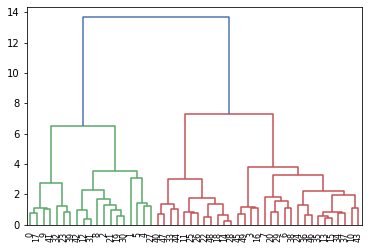

In [15]:
dendrogram = sch.dendrogram(sch.linkage(crime2_norm, method='ward'))           # Ward method
plt.show()

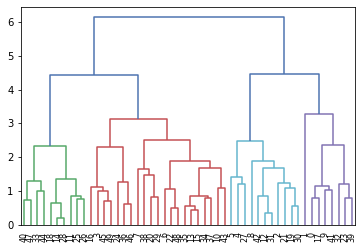

In [16]:
dendrogram = sch.dendrogram(sch.linkage(crime2_norm, method='complete'))       # Complete method
plt.show()

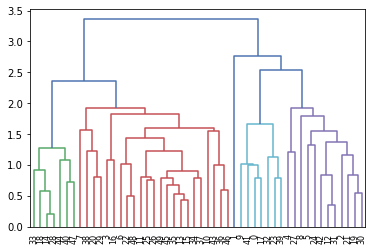

In [17]:
dendrogram = sch.dendrogram(sch.linkage(crime2_norm, method='average'))        # Average method
plt.show()

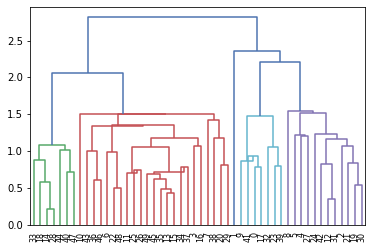

In [18]:
dendrogram = sch.dendrogram(sch.linkage(crime2_norm, method='centroid'))       # Centroid method
plt.show()

1. **Hierarchical Clustering**

In [19]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')     # Create clusters

In [20]:
y_hc = hc.fit_predict(crime2_norm)                # save clusters for chart
y_hc

array([0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [21]:
clusters = pd.DataFrame(y_hc,columns=['clusters'])
clusters.head()

,clusters
0,0
1,3
2,0
3,0
4,1


In [22]:
crime2['h_clustersid'] = clusters
crime2

,City,Murder,Assault,UrbanPop,Rape,h_clustersid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [26]:
clusters.value_counts()

clusters
0           46
1            2
2            1
3            1
dtype: int64

In [27]:
crime2['h_clustersid'] = hc.labels_           # Adding clusters to dataset
crime2

,City,Murder,Assault,UrbanPop,Rape,h_clustersid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [28]:
crime2.groupby('h_clustersid').agg(['mean']).reset_index()        # Group data by clusters 

,h_clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.452174,161.130435,64.717391,19.534783
1,1,10.600000,264.000000,86.000000,43.300000
2,2,15.400000,335.000000,80.000000,31.900000
3,3,10.000000,263.000000,48.000000,44.500000


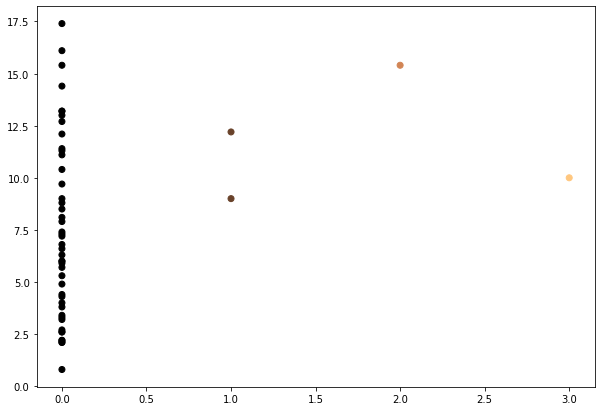

In [69]:
plt.figure(figsize=(10, 7))                  # Plot clusters for Murder
plt.scatter(crime2['h_clustersid'],crime2['Murder'], c=hc.labels_, cmap='copper')
plt.show()

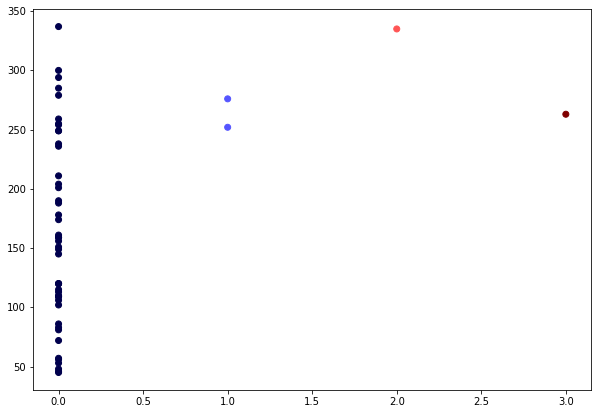

In [35]:
plt.figure(figsize=(10, 7))                  # Plot clusters for Assault
plt.scatter(crime2['h_clustersid'],crime2['Assault'], c=hc.labels_, cmap='seismic')
plt.show()

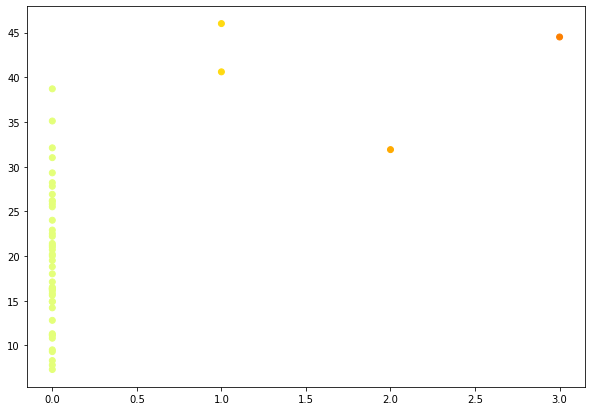

In [72]:
plt.figure(figsize=(10, 7))                  # Plot clusters for Rape
plt.scatter(crime2['h_clustersid'],crime2['Rape'], c=hc.labels_, cmap='Wistia')
plt.show()

2. **K-Means Clustering**

- Use Elbow Graph to find optimum number of  clusters (K value) from K values range
- The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
- random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change

 ***Within Cluster Sum-of-Squares criterion*** 

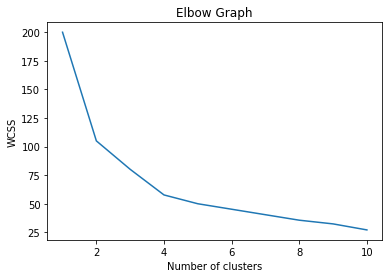

In [36]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime2_norm)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 #### Build Clustering model using K=4

In [45]:
clusters4 = KMeans(4,random_state=30).fit(crime2_norm)           # K-Means clustering model (K=4)
clusters4

KMeans(n_clusters=4, random_state=30)

In [46]:
clusters4.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1], dtype=int32)

In [47]:
crime4 = crime2.copy()
crime4['clusters4id'] = clusters4.labels_                # Assigning clusters to dataset
crime4

,City,Murder,Assault,UrbanPop,Rape,h_clustersid,clusters4id
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,3,3
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,3
5,Colorado,7.9,204,78,38.7,0,3
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,2,3
9,Georgia,17.4,211,60,25.8,0,0


In [48]:
clusters4.cluster_centers_       # Compute the centroids for K=4 clusters with 11 variables

array([[ 1.42622412,  0.88321132,  0.01946669, -0.82279055],
       [-0.49440658, -0.3864845 , -0.26431024,  0.58167593],
       [-0.97130281, -1.11783581, -0.97657842, -0.93954982],
       [ 0.70212683,  1.04999438,  1.28990383,  0.72997363]])

In [49]:
crime4.groupby('clusters4id').agg(['mean']).reset_index()        # Group data by Clusters (K=4)

,clusters4id,Murder,Assault,UrbanPop,Rape,h_clustersid
,,mean,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500,0.000000
1,1,5.656250,138.875000,73.875000,18.781250,0.000000
2,2,3.600000,78.538462,52.076923,12.176923,0.000000
3,3,10.815385,257.384615,76.000000,33.192308,0.538462


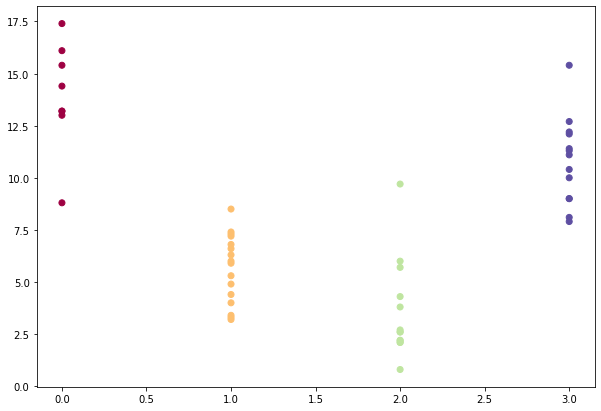

In [73]:
plt.figure(figsize=(10, 7))                  # Plot clusters for Murder
plt.scatter(crime4['clusters4id'],crime4['Murder'], c=clusters4.labels_, cmap= 'Spectral')
plt.show()

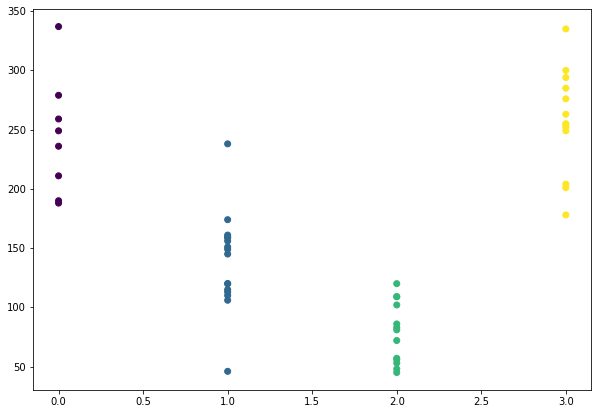

In [50]:
plt.figure(figsize=(10, 7))                  # Plot clusters for Assault
plt.scatter(crime4['clusters4id'],crime4['Assault'], c=clusters4.labels_, cmap= 'viridis')
plt.show()

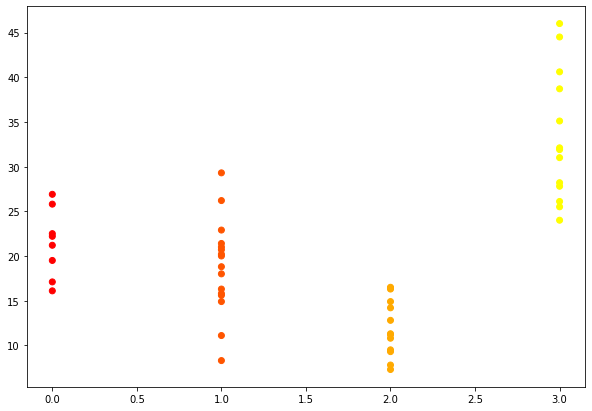

In [74]:
plt.figure(figsize=(10, 7))                  # Plot clusters for Rape
plt.scatter(crime4['clusters4id'],crime4['Rape'], c=clusters4.labels_, cmap= 'autumn')
plt.show()

 #### Build Clustering model using K=5

In [44]:
clusters5 = KMeans(5,random_state=30).fit(crime2_norm)          # K-Means clustering model (K=5)
clusters5

KMeans(n_clusters=5, random_state=12)

In [51]:
clusters5.labels_

array([3, 1, 1, 2, 1, 1, 4, 2, 1, 3, 4, 0, 1, 2, 0, 2, 2, 3, 0, 1, 4, 1,
       0, 3, 1, 2, 2, 1, 0, 4, 1, 1, 3, 0, 4, 2, 2, 4, 4, 3, 0, 3, 1, 4,
       0, 2, 4, 0, 0, 2], dtype=int32)

In [52]:
crime5 = crime2.copy()                 # Adding clusters to dataset
crime5['clusters5id'] = clusters5.labels_
crime5

,City,Murder,Assault,UrbanPop,Rape,h_clustersid,clusters5id
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,0,4
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,0,3


In [53]:
clusters5.cluster_centers_                   # Compute the centroids for K=5 clusters with 11 variables

array([[-1.18467401, -1.2201201 , -1.11321445, -1.01470522],
       [ 0.70212683,  1.04999438,  1.28990383,  0.72997363],
       [-0.23125052, -0.30342672, -0.23973789, -0.27242367],
       [ 1.59644066,  0.97606837,  0.0489325 , -0.78540457],
       [-0.65691529, -0.54927896, -0.37133511,  1.01687638]])

In [54]:
crime5.groupby('clusters5id').agg(['mean']).reset_index()          # Group data by clusters (K=5)

,clusters5id,Murder,Assault,UrbanPop,Rape,h_clustersid
,,mean,mean,mean,mean,mean
0,0,2.680000,70.100000,51.000000,10.910000,0.000000
1,1,10.815385,257.384615,76.000000,33.192308,0.538462
2,2,6.790909,145.727273,61.636364,19.009091,0.000000
3,3,14.671429,251.285714,54.285714,21.685714,0.000000
4,4,4.955556,125.444444,80.111111,17.788889,0.000000


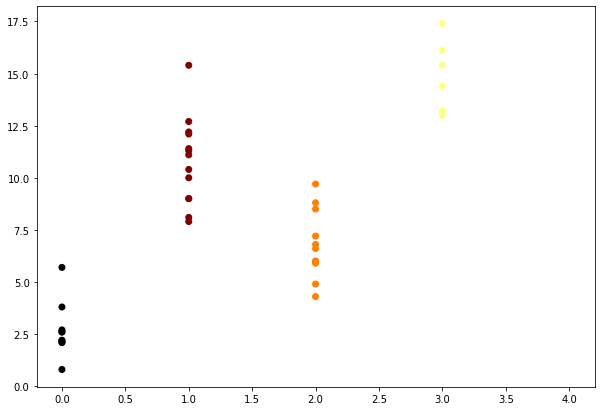

In [75]:
plt.figure(figsize=(10, 7))             # Plot clusters for Murder
plt.scatter(crime5['clusters5id'],crime5['Murder'], c=clusters5.labels_, cmap='afmhot')
plt.show()

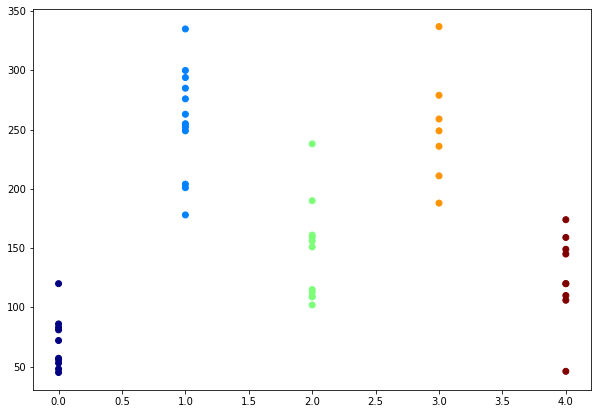

In [56]:
plt.figure(figsize=(10, 7))             # Plot clusters for Assault
plt.scatter(crime5['clusters5id'],crime5['Assault'], c=clusters5.labels_, cmap='jet')
plt.show()

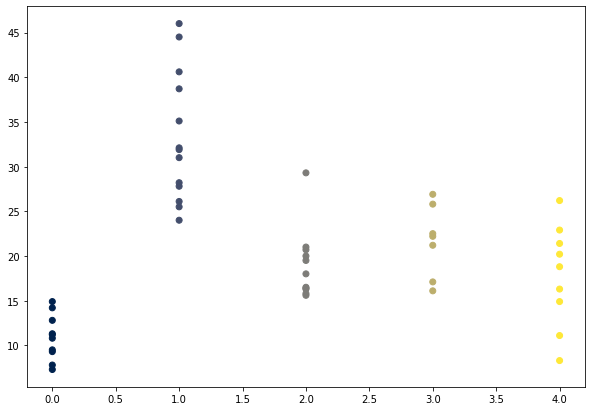

In [76]:
plt.figure(figsize=(10, 7))             # Plot clusters for Rape
plt.scatter(crime5['clusters5id'],crime5['Rape'], c=clusters5.labels_, cmap='cividis')
plt.show()

3. **DBSCAN Clustering**

In [58]:
crime2 = crime2.drop(columns="City")

In [59]:
array = crime2.values

In [60]:
sc = StandardScaler()                        # Using StandardScaler to normalize airlines2
crime3_norm = sc.fit_transform(crime2)

In [61]:
clusters6 = DBSCAN(eps=1,min_samples=4)         # DBSCAN Clustering
clusters6.fit(crime3_norm)

DBSCAN(eps=1, min_samples=4)

In [62]:
clusters6.labels_                               # Noisy samples are given the label -1.

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [63]:
crime6 = crime2.copy()                 # Adding clusters to dataset
crime6['clusters6id'] = clusters6.labels_
crime6

,Murder,Assault,UrbanPop,Rape,h_clustersid,clusters6id
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,3,-1
2,8.1,294,80,31.0,0,-1
3,8.8,190,50,19.5,0,-1
4,9.0,276,91,40.6,1,-1
5,7.9,204,78,38.7,0,-1
6,3.3,110,77,11.1,0,1
7,5.9,238,72,15.8,0,-1
8,15.4,335,80,31.9,2,-1
9,17.4,211,60,25.8,0,-1


In [64]:
crime6.groupby('clusters6id').agg(['mean']).reset_index()        # Group data by clusters

,clusters6id,Murder,Assault,UrbanPop,Rape,h_clustersid
,,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,0.388889
1,0,14.050000,238.000000,57.750000,23.200000,0.000000
2,1,4.825000,112.035714,63.357143,16.107143,0.000000


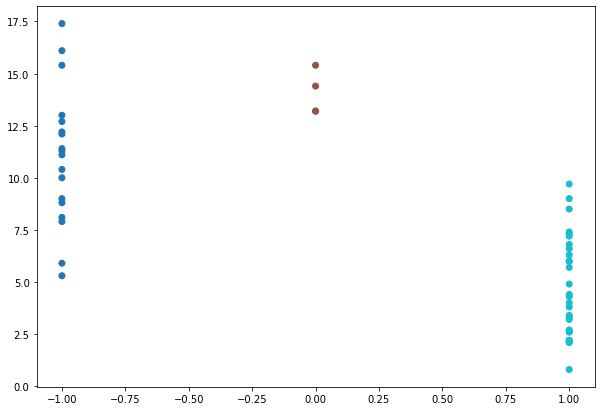

In [78]:
plt.figure(figsize=(10,7))                       # Plot clusters for Murder
plt.scatter(crime6['clusters6id'],crime6['Murder'],c=clusters6.labels_,cmap='tab10')
plt.show()

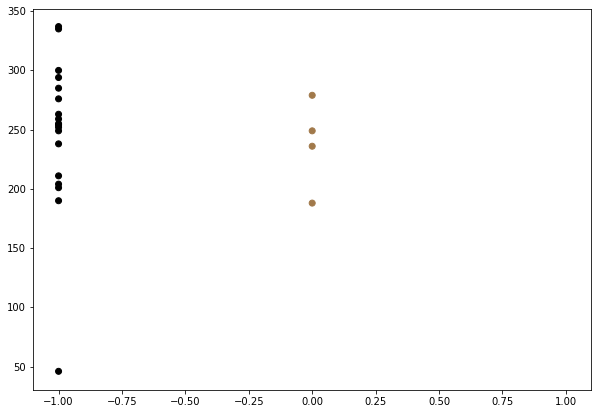

In [65]:
plt.figure(figsize=(10,7))                       # Plot clusters for Assault
plt.scatter(crime6['clusters6id'],crime6['Assault'],c=clusters6.labels_,cmap='cubehelix')
plt.show()

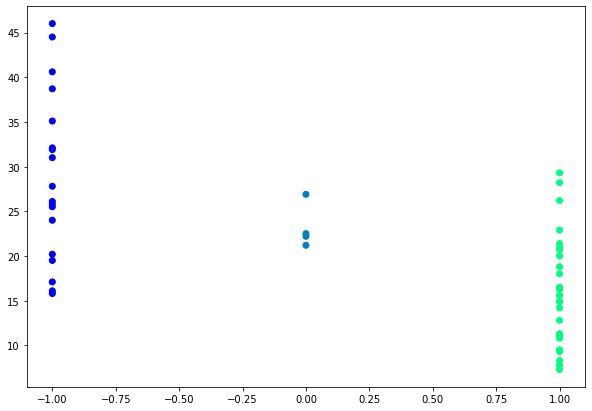

In [80]:
plt.figure(figsize=(10,7))                       # Plot clusters for Rape
plt.scatter(crime6['clusters6id'],crime6['Rape'],c=clusters6.labels_,cmap='winter')
plt.show()

**---------------------------------------------------------------------------------------------------------------------------------------------------------**